In [1]:
from nltk import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#df = pd.read_csv("SOMENTE DADOS BRUTOS(NOVO).txt", encoding='utf-16')
df = pd.read_csv("data.txt", sep=',', header=None, names=['text','sentiment'])

In [3]:
df

,text,sentiment
0,RT @tirunjr: já pensou presentear sua tia quer...,#Feliz
1,já pensou presentear sua tia querida no amigo ...,#Feliz
2,RT @BTSONCHAT: nam: hoje no shopping com o ani...,#Feliz
3,Lindo Sabadoooo 🎀ECoracao #Hola #Sabado #Lind...,#Feliz
4,"Se um minuto do seu lado já me deixa #feliz, i...",#Feliz
...,...,...
11417,muito ruim ficar sem óculos #triste,#Triste
11418,#TRISTE | #RN Mulher morre após ser bal...,#Triste
11419,meu nenê ta bravo #triste,#Triste
11420,RT @crazycatladybr: O discurso de na saúde e n...,#Triste


In [4]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [5]:
df['sentiment'].unique() #amor e feliz = 1 , triste e chateado = -1

array(['#Feliz', '#Chateado', '#Inveja', '#Ironia', '#Raiva', '#Triste',
       '#Amor'], dtype=object)

In [6]:
df[df['sentiment'] == '#Inveja']

,text,sentiment
171,Aiiiii que ódioooo da Bruna Lombardi! ESorride...,#Inveja
172,Tem gente q a vontade é perguntar: vc imaginav...,#Inveja
173,Tá todo mundo pulando de bungee jump hj... tbe...,#Inveja
174,@T7agoxOficial Mano tu n gostas pk es hater e ...,#Inveja
175,RT @IPompermayer: @guszavo @EuRobo36 @cartamai...,#Inveja
...,...,...
11152,"A melhor forma de calar #fofoca , #inveja, #vi...",#Inveja
11153,Fizeram uma lista na escola da minha irmã e el...,#Inveja
11154,"@umeoitentae1 @manodevitto Fofa, fica meio est...",#Inveja
11155,"Não precisa ter muito , nego #Inveja até o pou...",#Inveja


In [7]:
df_remove = df[df['sentiment'] == '#Inveja'].index
df = df.drop(df_remove)

df_remove = df[df['sentiment'] == '#Raiva'].index
df = df.drop(df_remove)

df_remove = df[df['sentiment'] == '#Ironia'].index
df = df.drop(df_remove)

In [8]:
df

,text,sentiment
0,RT @tirunjr: já pensou presentear sua tia quer...,#Feliz
1,já pensou presentear sua tia querida no amigo ...,#Feliz
2,RT @BTSONCHAT: nam: hoje no shopping com o ani...,#Feliz
3,Lindo Sabadoooo 🎀ECoracao #Hola #Sabado #Lind...,#Feliz
4,"Se um minuto do seu lado já me deixa #feliz, i...",#Feliz
...,...,...
11417,muito ruim ficar sem óculos #triste,#Triste
11418,#TRISTE | #RN Mulher morre após ser bal...,#Triste
11419,meu nenê ta bravo #triste,#Triste
11420,RT @crazycatladybr: O discurso de na saúde e n...,#Triste


In [9]:
df['sentiment'].unique()

array(['#Feliz', '#Chateado', '#Triste', '#Amor'], dtype=object)

In [10]:
def binario(termo):
    if termo == '#Feliz' or termo == '#Amor':
        return 1
    elif termo == '#Triste' or termo == '#Chateado':
        return 0       
    
df['sentiment'] = df['sentiment'].apply(binario)

In [11]:
df['sentiment'].value_counts()

1    4720
0    4504
Name: sentiment, dtype: int64

In [12]:
def Tokenize(f):     ## Pre-processando a frase

    ## Colocando em minusculo
    ## Retirando a pontuaçao
    ## Retirando as StopWords
    
    f = f.lower().replace('\n', '').replace('-','').replace('#','').replace('.','').replace(',','').replace('!','').replace('r\n','').replace('  ','').replace('https','').replace('rt','').replace('rn','')
    token = RegexpTokenizer(r"\w+")
    f = token.tokenize(f)
    
    stop_words = set(stopwords.words('portuguese'))
    
    new_word = [word for word in f if not word in stop_words]
    
    return ' '.join(new_word)

def remove_user(frase):
    frase = re.sub('@\w+','',frase)
    frase = re.sub('{https}[^ ]+','',frase)
    frase = re.sub('https\w+','',frase)
    # re.sub('#\w+','',frase)
    return frase

def pre_X(frases):
    lista = []
    
    for frase in frases:
        lista.append(frase)
        
    return lista

def pre_Y(number):
    lista = []
    
    for numb in number:
        lista.append(numb)
    
    return lista


In [13]:
df['text'][9146]

'Isso lembrou tanto a gente. Valeu, foi bom demais enquanto durou, e sei que o nosso sentimento foi verdadeiro e gos… {https}://t.co/2naG1Ussu1'

In [14]:
remove_user(df['text'][9146])

'Isso lembrou tanto a gente. Valeu, foi bom demais enquanto durou, e sei que o nosso sentimento foi verdadeiro e gos… '

In [15]:
Tokenize(remove_user(df['text'][9146]))

'lembrou tanto gente valeu bom demais enquanto durou sei sentimento verdadeiro gos'

In [16]:
df['text'] = df['text'].apply(remove_user)
df['text'] = df['text'].apply(Tokenize)

In [17]:
df

,text,sentiment
0,pensou presentear tia querida amigo secreto de...,1
1,pensou presentear tia querida amigo secreto de...,1
2,nam hoje shopping aniversariante jungkook feli...,1
3,lindo sabadoooo ecoracaohola sabado lindodia f...,1
4,minuto lado deixa feliz imagine vida toda egri...,1
...,...,...
11417,ruim ficar óculos triste,0
11418,triste mulher morre após ser baleada pescoço e...,0
11419,nenê ta bravo triste,0
11420,discurso saúde doença td mentira 1 chance cai ...,0


In [18]:
text = df['text']
sentiment = np.asarray(df['sentiment'])


In [19]:
count_vect = CountVectorizer()
X = count_vect.fit_transform(text)

tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X)
X.shape

(9224, 17314)

In [20]:
sentiment.shape

(9224,)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, sentiment, test_size=0.3)

clf = MultinomialNB().fit(X_train, Y_train)
predicted = clf.predict(X_test)

print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1351
           1       0.98      0.91      0.94      1417

    accuracy                           0.94      2768
   macro avg       0.94      0.94      0.94      2768
weighted avg       0.94      0.94      0.94      2768



In [117]:
kf = KFold(n_splits=10)
clf = MultinomialNB()

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = sentiment[train_index], sentiment[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(clf.score(X_test, y_test))


0.9328277356446371
0.942578548212351
0.914409534127844
0.9100758396533044
0.920824295010846
0.9327548806941431
0.9370932754880694
0.928416485900217
0.8590021691973969
0.940347071583514


In [22]:
def set_array(frases):
    
    vocab = []
    palavras = []
    for frase in frases:
        
        text_array = remove_user(frase)
        text_array = Tokenize(text_array)
        text_array = text_array.split(' ')
        for i in range(len(text_array)):
            vocab.append(text_array[i])
    
    
        
    return vocab

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(1 , activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, sentiment, test_size=0.3)

fit = model.fit(X_train.todense(), Y_train, epochs=5, validation_data=(X_test.todense(), Y_test))

Epoch 1/5
202/202 [==============================] - 2s 8ms/step - loss: 0.3916 - accuracy: 0.8552 - val_loss: 0.0846 - val_accuracy: 0.9711
Epoch 2/5
202/202 [==============================] - 1s 6ms/step - loss: 0.0438 - accuracy: 0.9902 - val_loss: 0.0717 - val_accuracy: 0.9697
Epoch 3/5
202/202 [==============================] - 1s 6ms/step - loss: 0.0099 - accuracy: 0.9991 - val_loss: 0.0806 - val_accuracy: 0.9697
Epoch 4/5
202/202 [==============================] - 1s 6ms/step - loss: 0.0073 - accuracy: 0.9992 - val_loss: 0.0886 - val_accuracy: 0.9678
Epoch 5/5
202/202 [==============================] - 1s 6ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.0948 - val_accuracy: 0.9675


In [25]:
predicted = model.predict(X_test.todense())


for i in range(len(predicted)):
    if predicted[i,0] >= 0.5:
        predicted[i,0] = 1
    
    else:
        predicted[i,0] = 0

print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1356
           1       0.97      0.97      0.97      1412

    accuracy                           0.97      2768
   macro avg       0.97      0.97      0.97      2768
weighted avg       0.97      0.97      0.97      2768



In [62]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(X):
    cont += 1
    
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(1 , activation='sigmoid')
    
    ])
    
    model.compile(
        optimizer='adam',
        loss="binary_crossentropy",
        metrics=['accuracy']
    )
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = sentiment[train_index], sentiment[test_index]
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit(X_train.todense(), y_train, epochs=5, validation_data=(X_test.todense(), y_test))
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

Iter:  1
 
Epoch 1/5
260/260 [==============================] - 1s 6ms/step - loss: 0.3427 - accuracy: 0.8583 - val_loss: 0.0837 - val_accuracy: 0.9751
Epoch 2/5
260/260 [==============================] - 1s 5ms/step - loss: 0.0415 - accuracy: 0.9899 - val_loss: 0.0751 - val_accuracy: 0.9653
Epoch 3/5
260/260 [==============================] - 1s 5ms/step - loss: 0.0109 - accuracy: 0.9990 - val_loss: 0.0704 - val_accuracy: 0.9718
Epoch 4/5
260/260 [==============================] - 1s 6ms/step - loss: 0.0067 - accuracy: 0.9994 - val_loss: 0.0919 - val_accuracy: 0.9751
Epoch 5/5
260/260 [==============================] - 1s 5ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.0895 - val_accuracy: 0.9718
 
Iter:  2
 
Epoch 1/5
260/260 [==============================] - 2s 7ms/step - loss: 0.3382 - accuracy: 0.8717 - val_loss: 0.0837 - val_accuracy: 0.9675
Epoch 2/5
260/260 [==============================] - 1s 5ms/step - loss: 0.0371 - accuracy: 0.9908 - val_loss: 0.0828 - val_accura

In [63]:
def media_std(val_accuracy):
    matrix_acc = np.array(val_accuracy)
    
    for i in range(len(matrix_acc)):
        print(f' Fold: {i}\tMédia: {matrix_acc[i].mean()}\tStd: {matrix_acc[i].std()} ')
        
media_std(val_accuracy) #arquitetura de cima

 Fold: 0	Média: 0.9718309760093689	Std: 0.0035605044614362698 
 Fold: 1	Média: 0.9703141927719117	Std: 0.002955187586855008 
 Fold: 2	Média: 0.9573131084442139	Std: 0.007399076276034564 
 Fold: 3	Média: 0.9588298916816711	Std: 0.0006852047431838364 
 Fold: 4	Média: 0.9726681113243103	Std: 0.005418655698336307 
 Fold: 5	Média: 0.9691973924636841	Std: 0.002336286681146252 
 Fold: 6	Média: 0.9678958892822266	Std: 0.0014712297872709452 
 Fold: 7	Média: 0.9765726685523987	Std: 0.009243950093606096 
 Fold: 8	Média: 0.9366594433784485	Std: 0.009907310828398677 
 Fold: 9	Média: 0.967678964138031	Std: 0.0012648330588951192 


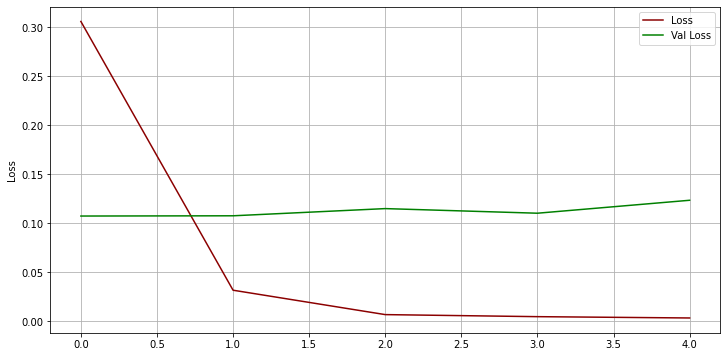

In [64]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

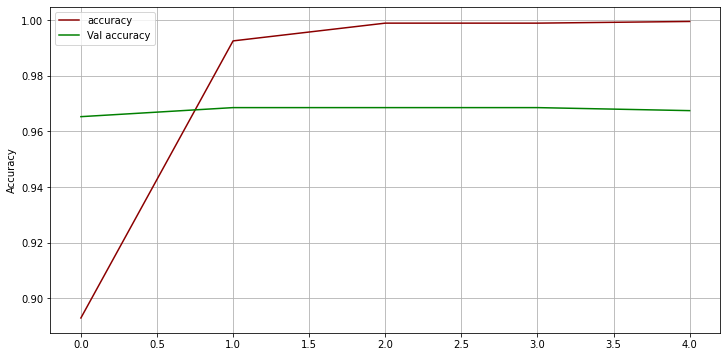

In [65]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [26]:
vectorize_layer = TextVectorization(
 max_tokens=15000,
 output_mode='int',
 output_sequence_length=len(max(df['text'])))

vocab = set_array(df['text'])

vectorize_layer.adapt(np.unique(vocab))
len(vectorize_layer.get_vocabulary())


15000

In [27]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(10 , activation='tanh', return_sequences=True),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    
    tf.keras.layers.Dense(1 , activation='sigmoid')
])


model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], sentiment, test_size=0.3)

In [29]:
fit = model.fit(X_train, Y_train, epochs=5, batch_size=128 ,validation_data=(X_test, Y_test)) 

Epoch 1/5
51/51 [==============================] - 12s 226ms/step - loss: 0.6868 - accuracy: 0.5132 - val_loss: 0.6616 - val_accuracy: 0.5126
Epoch 2/5
51/51 [==============================] - 9s 173ms/step - loss: 0.5239 - accuracy: 0.7673 - val_loss: 0.4785 - val_accuracy: 0.8230
Epoch 3/5
51/51 [==============================] - 9s 174ms/step - loss: 0.2703 - accuracy: 0.9278 - val_loss: 0.4010 - val_accuracy: 0.8439
Epoch 4/5
51/51 [==============================] - 10s 192ms/step - loss: 0.1657 - accuracy: 0.9555 - val_loss: 0.3965 - val_accuracy: 0.8613
Epoch 5/5
51/51 [==============================] - 10s 189ms/step - loss: 0.1112 - accuracy: 0.9709 - val_loss: 0.3525 - val_accuracy: 0.8743


In [31]:
predicted = model.predict(X_test)


for i in range(len(predicted)):
    if predicted[i,0] >= 0.5:
        predicted[i,0] = 1
    
    else:
        predicted[i,0] = 0

print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1356
           1       0.88      0.88      0.88      1412

    accuracy                           0.87      2768
   macro avg       0.87      0.87      0.87      2768
weighted avg       0.87      0.87      0.87      2768



In [36]:
Tweet_preprocessed = np.asarray(pre_X(df['text']))

In [75]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

Tweet_preprocessed = np.asarray(pre_X(df['text']))

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(10 , activation='tanh', return_sequences=True),
    
    tf.keras.layers.LSTM(10 , activation='tanh', return_sequences=True),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
    
    ])


    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss="binary_crossentropy",
        metrics=['accuracy']
    )
    
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = sentiment[train_index], sentiment[test_index]

    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train, epochs=5, batch_size=128 ,validation_data=(X_test, y_test)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))


Iter:  1
 
Epoch 1/5
65/65 [==============================] - 17s 261ms/step - loss: 0.6876 - accuracy: 0.5251 - val_loss: 0.6921 - val_accuracy: 0.3846
Epoch 2/5
65/65 [==============================] - 14s 213ms/step - loss: 0.5007 - accuracy: 0.7593 - val_loss: 0.5301 - val_accuracy: 0.8104
Epoch 3/5
65/65 [==============================] - 13s 198ms/step - loss: 0.3033 - accuracy: 0.9016 - val_loss: 0.5038 - val_accuracy: 0.8321
Epoch 4/5
65/65 [==============================] - 13s 194ms/step - loss: 0.2133 - accuracy: 0.9376 - val_loss: 0.4043 - val_accuracy: 0.8657
Epoch 5/5
65/65 [==============================] - 13s 205ms/step - loss: 0.1611 - accuracy: 0.9543 - val_loss: 0.4089 - val_accuracy: 0.8483
 
Iter:  2
 
Epoch 1/5
65/65 [==============================] - 16s 249ms/step - loss: 0.6888 - accuracy: 0.5250 - val_loss: 0.7144 - val_accuracy: 0.3705
Epoch 2/5
65/65 [==============================] - 15s 225ms/step - loss: 0.5519 - accuracy: 0.7171 - val_loss: 0.4861 - val

In [76]:
media_std(val_accuracy)

 Fold: 0	Média: 0.74821235537529	Std: 0.18271109806251934 
 Fold: 1	Média: 0.7713976204395294	Std: 0.2012848333385508 
 Fold: 2	Média: 0.7393283009529114	Std: 0.19854234170827292 
 Fold: 3	Média: 0.747995662689209	Std: 0.18468937703297575 
 Fold: 4	Média: 0.8058568358421325	Std: 0.07835878868699388 
 Fold: 5	Média: 0.7711496710777282	Std: 0.09826727123073502 
 Fold: 6	Média: 0.8106290578842164	Std: 0.039919134231444366 
 Fold: 7	Média: 0.7414316654205322	Std: 0.11029168912531441 
 Fold: 8	Média: 0.7744034767150879	Std: 0.030228986608855077 
 Fold: 9	Média: 0.7314533501863479	Std: 0.2458099770579018 


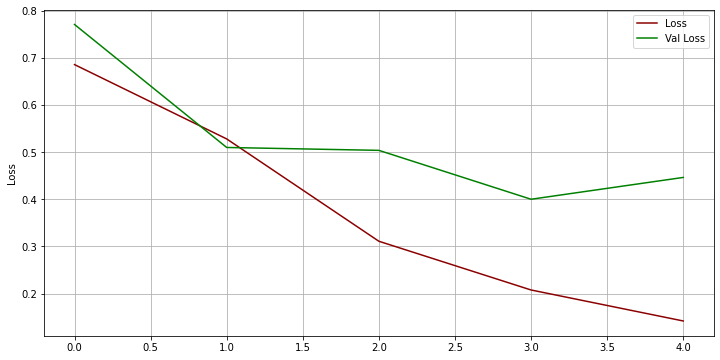

In [77]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

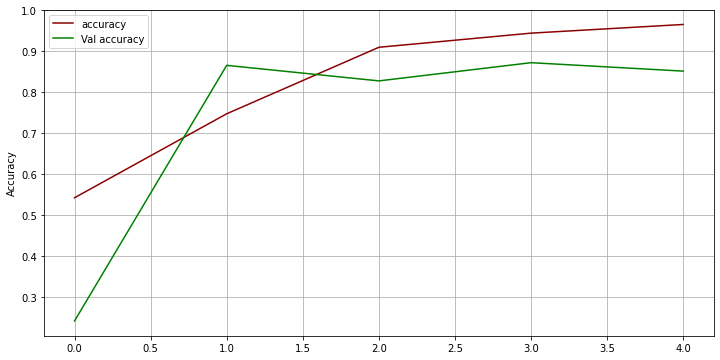

In [78]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [37]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, sentiment, test_size=0.3)


In [38]:
fit = model.fit(X_train, Y_train, epochs=5, batch_size=128 ,validation_data=(X_test, Y_test))

Epoch 1/5
51/51 [==============================] - 8s 162ms/step - loss: 0.4622 - accuracy: 0.8632 - val_loss: 0.1580 - val_accuracy: 0.9530
Epoch 2/5
51/51 [==============================] - 6s 119ms/step - loss: 0.0682 - accuracy: 0.9820 - val_loss: 0.1240 - val_accuracy: 0.9668
Epoch 3/5
51/51 [==============================] - 6s 118ms/step - loss: 0.0238 - accuracy: 0.9958 - val_loss: 0.1228 - val_accuracy: 0.9650
Epoch 4/5
51/51 [==============================] - 6s 117ms/step - loss: 0.0127 - accuracy: 0.9975 - val_loss: 0.1233 - val_accuracy: 0.9657
Epoch 5/5
51/51 [==============================] - 6s 119ms/step - loss: 0.0075 - accuracy: 0.9989 - val_loss: 0.1337 - val_accuracy: 0.9660


In [39]:
predicted = model.predict(X_test)


for i in range(len(predicted)):
    if predicted[i,0] >= 0.5:
        predicted[i,0] = 1
    
    else:
        predicted[i,0] = 0

print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1317
           1       0.97      0.97      0.97      1451

    accuracy                           0.97      2768
   macro avg       0.97      0.97      0.97      2768
weighted avg       0.97      0.97      0.97      2768



In [84]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss="binary_crossentropy",
        metrics=['accuracy']
    )
    
    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = sentiment[train_index], sentiment[test_index]
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train, epochs=5, batch_size=128 ,validation_data=(X_test, y_test)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))


Iter:  1
 
Epoch 1/5
65/65 [==============================] - 41s 638ms/step - loss: 0.3970 - accuracy: 0.8530 - val_loss: 0.1533 - val_accuracy: 0.9599
Epoch 2/5
65/65 [==============================] - 39s 607ms/step - loss: 0.0546 - accuracy: 0.9852 - val_loss: 0.1441 - val_accuracy: 0.9632
Epoch 3/5
65/65 [==============================] - 39s 596ms/step - loss: 0.0179 - accuracy: 0.9966 - val_loss: 0.1475 - val_accuracy: 0.9621
Epoch 4/5
65/65 [==============================] - 43s 660ms/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.1438 - val_accuracy: 0.9621
Epoch 5/5
65/65 [==============================] - 46s 711ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.1605 - val_accuracy: 0.9588
 
Iter:  2
 
Epoch 1/5
65/65 [==============================] - 41s 633ms/step - loss: 0.4085 - accuracy: 0.8630 - val_loss: 0.1456 - val_accuracy: 0.9447
Epoch 2/5
65/65 [==============================] - 38s 585ms/step - loss: 0.0628 - accuracy: 0.9845 - val_loss: 0.1215 - val

In [85]:
media_std(val_accuracy)

 Fold: 0	Média: 0.9612134337425232	Std: 0.0015923157353843389 
 Fold: 1	Média: 0.9482123732566834	Std: 0.004461805294437346 
 Fold: 2	Média: 0.9427952289581298	Std: 0.01653631544174079 
 Fold: 3	Média: 0.9523293614387512	Std: 0.0031400601850312244 
 Fold: 4	Média: 0.9631236553192138	Std: 0.004338392615325464 
 Fold: 5	Média: 0.9611713647842407	Std: 0.0018660176898337723 
 Fold: 6	Média: 0.9570498824119568	Std: 0.002958396352591103 
 Fold: 7	Média: 0.9496746182441711	Std: 0.005681471331284873 
 Fold: 8	Média: 0.9301518559455871	Std: 0.007839174239633179 
 Fold: 9	Média: 0.953362250328064	Std: 0.0024732696806522006 


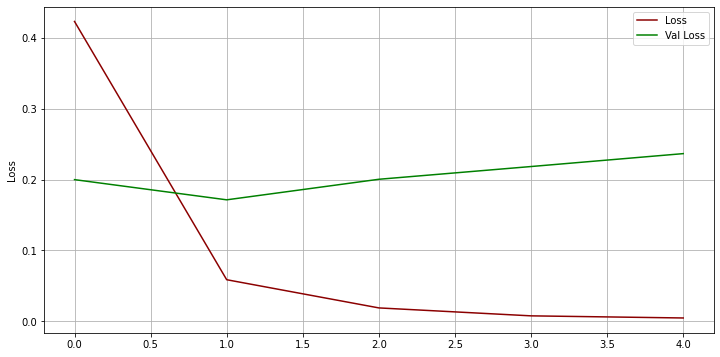

In [86]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

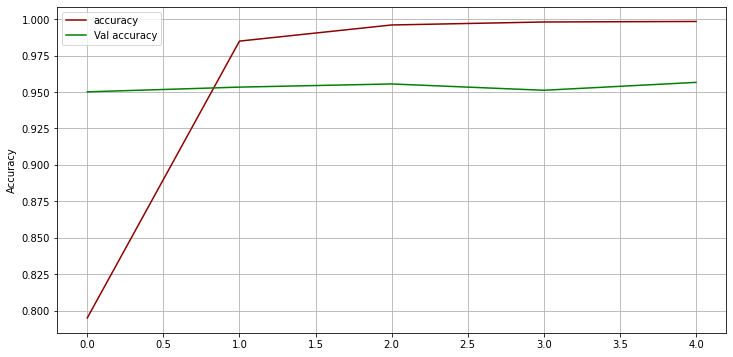

In [87]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [49]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(24,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, sentiment, test_size=0.3)


In [50]:
fit = model.fit(X_train, Y_train, epochs=5, batch_size=32 ,validation_data=(X_test, Y_test))

Epoch 1/5
202/202 [==============================] - 3s 14ms/step - loss: 0.3352 - accuracy: 0.8330 - val_loss: 0.1151 - val_accuracy: 0.9541
Epoch 2/5
202/202 [==============================] - 3s 15ms/step - loss: 0.0453 - accuracy: 0.9853 - val_loss: 0.1168 - val_accuracy: 0.9523
Epoch 3/5
202/202 [==============================] - 3s 15ms/step - loss: 0.0105 - accuracy: 0.9974 - val_loss: 0.1226 - val_accuracy: 0.9563
Epoch 4/5
202/202 [==============================] - 3s 16ms/step - loss: 0.0055 - accuracy: 0.9988 - val_loss: 0.1348 - val_accuracy: 0.9541
Epoch 5/5
202/202 [==============================] - 3s 13ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.1418 - val_accuracy: 0.9523


In [51]:
predicted = model.predict(X_test)


for i in range(len(predicted)):
    if predicted[i,0] >= 0.5:
        predicted[i,0] = 1
    
    else:
        predicted[i,0] = 0

print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1343
           1       0.96      0.94      0.95      1425

    accuracy                           0.95      2768
   macro avg       0.95      0.95      0.95      2768
weighted avg       0.95      0.95      0.95      2768



In [90]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(24,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')   
    
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss="binary_crossentropy",
        metrics=['accuracy']
    )
    
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = sentiment[train_index], sentiment[test_index]
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train, epochs=5, batch_size=128 ,validation_data=(X_test, y_test)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

Iter:  1
 
Epoch 1/5
65/65 [==============================] - 2s 36ms/step - loss: 0.5799 - accuracy: 0.6868 - val_loss: 0.2533 - val_accuracy: 0.9350
Epoch 2/5
65/65 [==============================] - 2s 35ms/step - loss: 0.1154 - accuracy: 0.9630 - val_loss: 0.1177 - val_accuracy: 0.9577
Epoch 3/5
65/65 [==============================] - 2s 37ms/step - loss: 0.0296 - accuracy: 0.9920 - val_loss: 0.1120 - val_accuracy: 0.9556
Epoch 4/5
65/65 [==============================] - 2s 36ms/step - loss: 0.0130 - accuracy: 0.9971 - val_loss: 0.1032 - val_accuracy: 0.9664
Epoch 5/5
65/65 [==============================] - 2s 34ms/step - loss: 0.0077 - accuracy: 0.9983 - val_loss: 0.1051 - val_accuracy: 0.9621
 
Iter:  2
 
Epoch 1/5
65/65 [==============================] - 2s 37ms/step - loss: 0.5159 - accuracy: 0.7551 - val_loss: 0.2288 - val_accuracy: 0.9328
Epoch 2/5
65/65 [==============================] - 2s 34ms/step - loss: 0.0905 - accuracy: 0.9686 - val_loss: 0.1266 - val_accuracy: 0.9

In [91]:
media_std(val_accuracy)

 Fold: 0	Média: 0.9553629517555237	Std: 0.010842901420988399 
 Fold: 1	Média: 0.9484290361404419	Std: 0.009182937218660585 
 Fold: 2	Média: 0.9317443132400512	Std: 0.020059430167125927 
 Fold: 3	Média: 0.9482123613357544	Std: 0.015328050340583222 
 Fold: 4	Média: 0.9691973805427552	Std: 0.00816264361625158 
 Fold: 5	Média: 0.9529284238815308	Std: 0.008693036235205 
 Fold: 6	Média: 0.9459869980812072	Std: 0.012335850527746918 
 Fold: 7	Média: 0.9427331805229187	Std: 0.02636622921906469 
 Fold: 8	Média: 0.9151843667030335	Std: 0.011689535045578252 
 Fold: 9	Média: 0.9403470873832702	Std: 0.004946539361160757 


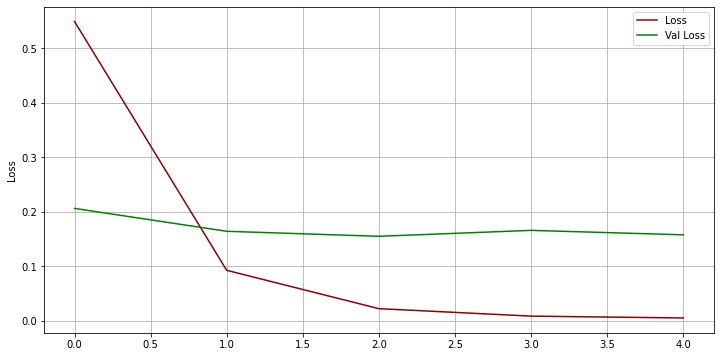

In [92]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

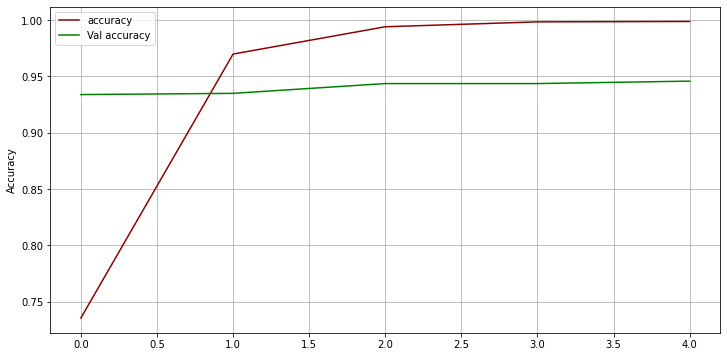

In [93]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()